Load libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

Load data

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

batch_size = 100

# MNIST dataset 
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

# Data loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

Show Example

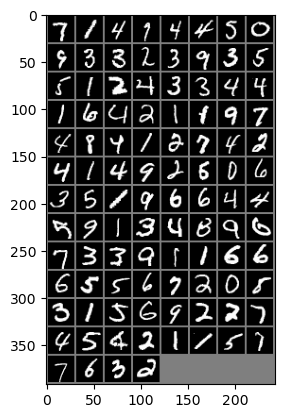

7     1     4     7     4     4     5     0     9     3     3     2     3     9     3     5     5     1     2     4     3     3     4     4     1     6     4     2     1     1     9     7     4     8     4     1     2     7     4     2     4     1     4     9     2     5     0     6     3     5     1     9     6     6     4     4     5     9     1     3     4     8     9     6     7     3     3     9     1     1     6     6     6     5     5     6     7     2     0     8     3     1     5     6     9     2     2     7     4     5     4     2     1     1     5     7     7     6     3     2    


In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


Neural Network #1

In [24]:
import torch.nn as nn

class ClassificationModel1(nn.Module):
    def __init__(self):
        super(ClassificationModel1, self).__init__()
        self.conv1= nn.Conv2d(1,16,5,padding='same')
        self.activation=torch.nn.ReLU()
        self.flatten= nn.Flatten()
        self.fc1 = nn.Linear(16*28*28, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.flatten(x)
        x = self.fc1(x)
        return x


nnet1 = ClassificationModel1() 


In [25]:
from torchinfo import summary

batch_size= 64

summary(nnet1, input_size=(batch_size,1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
ClassificationModel1                     [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          416
├─ReLU: 1-2                              [64, 16, 28, 28]          --
├─Flatten: 1-3                           [64, 12544]               --
├─Linear: 1-4                            [64, 10]                  125,450
Total params: 125,866
Trainable params: 125,866
Non-trainable params: 0
Total mult-adds (M): 28.90
Input size (MB): 0.20
Forward/backward pass size (MB): 6.43
Params size (MB): 0.50
Estimated Total Size (MB): 7.13

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(nnet1.parameters(), lr=0.01)

In [27]:
# Define an empty list to store the loss values
loss_list1 = []

epochs=20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = nnet1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print
    epoch_loss = running_loss / len(trainset)
    loss_list1.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}] loss: {epoch_loss:.3f}')
    
print('Finished Training')

Epoch [1/20] loss: 0.002
Epoch [2/20] loss: 0.001
Epoch [3/20] loss: 0.001
Epoch [4/20] loss: 0.000
Epoch [5/20] loss: 0.000
Epoch [6/20] loss: 0.000
Epoch [7/20] loss: 0.000
Epoch [8/20] loss: 0.000
Epoch [9/20] loss: 0.000
Epoch [10/20] loss: 0.000
Epoch [11/20] loss: 0.000
Epoch [12/20] loss: 0.000
Epoch [13/20] loss: 0.000
Epoch [14/20] loss: 0.000
Epoch [15/20] loss: 0.000
Epoch [16/20] loss: 0.000
Epoch [17/20] loss: 0.000
Epoch [18/20] loss: 0.000
Epoch [19/20] loss: 0.000
Epoch [20/20] loss: 0.000
Finished Training


Accuracy

In [28]:
correct =0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= nnet1(images)

        _, predicted=torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted ==labels).sum().item()
acc1=100*correct/total
print(f'Approx. accuracy of the network: {100*correct/total} %')

Approx. accuracy of the network: 97.57 %


Plot loss

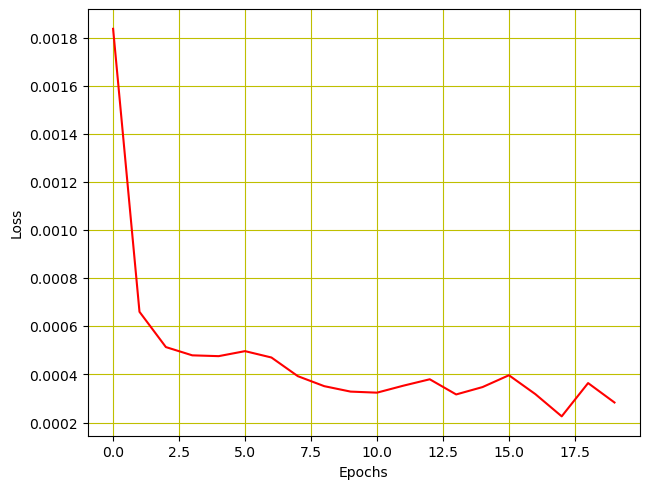

In [29]:
plt.plot(loss_list1, 'r')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Neural Network #2

In [10]:
import torch.nn as nn

class ClassificationModel2(nn.Module):
    def __init__(self):
        super(ClassificationModel2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding='same')
        self.conv2 = nn.Conv2d(6, 16, 5, padding='same')
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(12544, 84)
        self.layer2 = nn.Linear(84, 10)
        self.activation= nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x


nnet2 = ClassificationModel2() 


In [11]:
batch_size= 64

summary(nnet2, input_size=(batch_size,1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
ClassificationModel2                     [64, 10]                  --
├─Conv2d: 1-1                            [64, 6, 28, 28]           156
├─ReLU: 1-2                              [64, 6, 28, 28]           --
├─Conv2d: 1-3                            [64, 16, 28, 28]          2,416
├─ReLU: 1-4                              [64, 16, 28, 28]          --
├─Flatten: 1-5                           [64, 12544]               --
├─Linear: 1-6                            [64, 84]                  1,053,780
├─ReLU: 1-7                              [64, 84]                  --
├─Linear: 1-8                            [64, 10]                  850
Total params: 1,057,202
Trainable params: 1,057,202
Non-trainable params: 0
Total mult-adds (M): 196.55
Input size (MB): 0.20
Forward/backward pass size (MB): 8.88
Params size (MB): 4.23
Estimated Total Size (MB): 13.31

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(nnet2.parameters(), lr=0.01)

In [13]:
# Define an empty list to store the loss values
loss_list2 = []

epochs=20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = nnet2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print
    epoch_loss = running_loss / len(trainset)
    loss_list2.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}] loss: {epoch_loss:.3f}')
    
print('Finished Training')

Epoch [1/20] loss: 0.002
Epoch [2/20] loss: 0.001
Epoch [3/20] loss: 0.001
Epoch [4/20] loss: 0.001
Epoch [5/20] loss: 0.001
Epoch [6/20] loss: 0.001
Epoch [7/20] loss: 0.001
Epoch [8/20] loss: 0.001
Epoch [9/20] loss: 0.001
Epoch [10/20] loss: 0.001
Epoch [11/20] loss: 0.001
Epoch [12/20] loss: 0.001
Epoch [13/20] loss: 0.001
Epoch [14/20] loss: 0.001
Epoch [15/20] loss: 0.001
Epoch [16/20] loss: 0.001
Epoch [17/20] loss: 0.000
Epoch [18/20] loss: 0.001
Epoch [19/20] loss: 0.001
Epoch [20/20] loss: 0.000
Finished Training


Accuracy

In [14]:
correct =0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= nnet2(images)

        _, predicted=torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted ==labels).sum().item()
acc2=100*correct/total
print(f'Approx. accuracy of the network: {100*correct/total} %')

Approx. accuracy of the network: 97.42 %


Plot loss

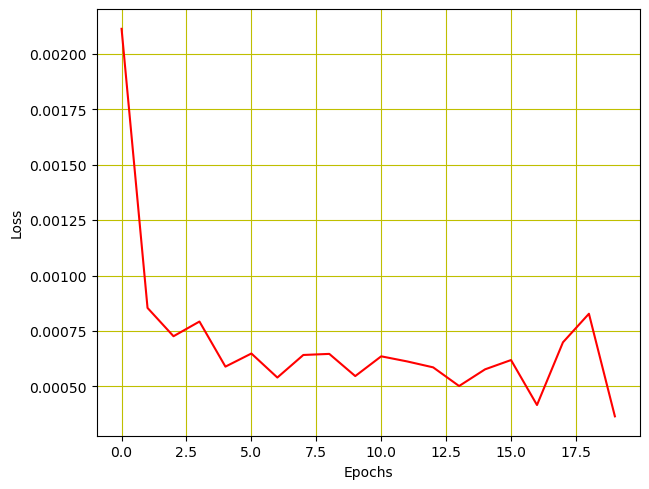

In [15]:
plt.plot(loss_list2, 'r')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Neural Network #3

In [31]:
import torch.nn as nn

class ClassificationModel3(nn.Module):
    def __init__(self):
        super(ClassificationModel3, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding='same')
        self.batch1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 5, padding='same')
        self.batch2 = nn.BatchNorm2d(16)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.activation = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.activation(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.activation(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        return x


nnet3 = ClassificationModel3() 


In [32]:
batch_size= 64

summary(nnet3, input_size=(batch_size,1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
ClassificationModel3                     [64, 10]                  --
├─Conv2d: 1-1                            [64, 6, 28, 28]           156
├─BatchNorm2d: 1-2                       [64, 6, 28, 28]           12
├─ReLU: 1-3                              [64, 6, 28, 28]           --
├─MaxPool2d: 1-4                         [64, 6, 14, 14]           --
├─Conv2d: 1-5                            [64, 16, 14, 14]          2,416
├─BatchNorm2d: 1-6                       [64, 16, 14, 14]          32
├─ReLU: 1-7                              [64, 16, 14, 14]          --
├─MaxPool2d: 1-8                         [64, 16, 7, 7]            --
├─Flatten: 1-9                           [64, 784]                 --
├─Linear: 1-10                           [64, 120]                 94,200
├─ReLU: 1-11                             [64, 120]                 --
├─Linear: 1-12                           [64, 84]                  10,164
├─R

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(nnet3.parameters(), lr=0.01)

In [34]:
# Define an empty list to store the loss values
loss_list3 = []

epochs=20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = nnet3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print
    epoch_loss = running_loss / len(trainset)
    loss_list3.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}] loss: {epoch_loss:.3f}')
    
print('Finished Training')

Epoch [1/20] loss: 0.002
Epoch [2/20] loss: 0.001
Epoch [3/20] loss: 0.001
Epoch [4/20] loss: 0.000
Epoch [5/20] loss: 0.000
Epoch [6/20] loss: 0.000
Epoch [7/20] loss: 0.000
Epoch [8/20] loss: 0.000
Epoch [9/20] loss: 0.000
Epoch [10/20] loss: 0.000
Epoch [11/20] loss: 0.000
Epoch [12/20] loss: 0.000
Epoch [13/20] loss: 0.000
Epoch [14/20] loss: 0.000
Epoch [15/20] loss: 0.000
Epoch [16/20] loss: 0.000
Epoch [17/20] loss: 0.000
Epoch [18/20] loss: 0.000
Epoch [19/20] loss: 0.000
Epoch [20/20] loss: 0.000
Finished Training


Accuracy

In [35]:
correct =0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= nnet3(images)

        _, predicted=torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted ==labels).sum().item()
acc3=100*correct/total
print(f'Approx. accuracy of the network: {100*correct/total} %')

Approx. accuracy of the network: 99.08 %


Plot loss

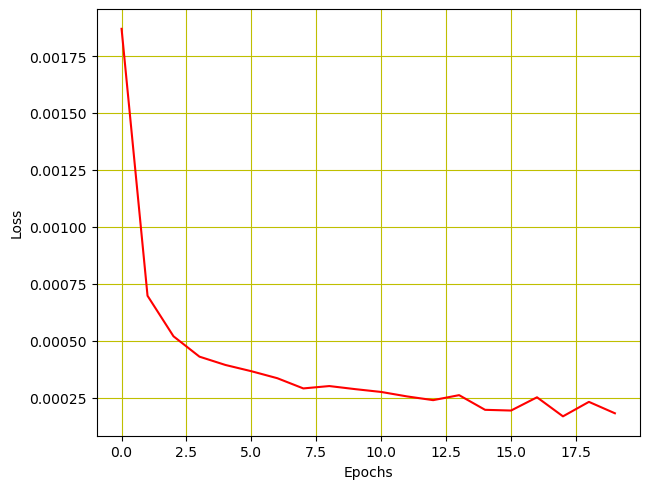

In [36]:
plt.plot(loss_list3, 'r')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Comparison between models

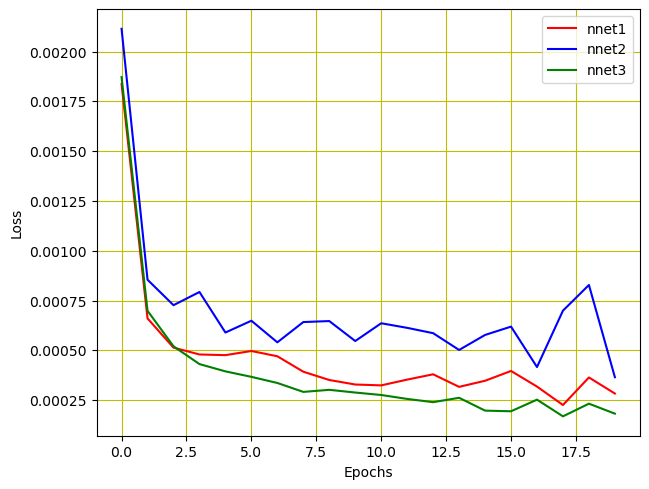

In [37]:
plt.plot(loss_list1, 'r', label='nnet1')
plt.plot(loss_list2, 'b', label='nnet2')
plt.plot(loss_list3, 'g', label='nnet3')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [38]:
print("NNet1 Accuracy: ", acc1)
print("NNet2 Accuracy: ", acc2)
print("NNet3 Accuracy: ", acc3)

NNet1 Accuracy:  97.57
NNet2 Accuracy:  97.42
NNet3 Accuracy:  99.08


We are going to answer the following questions:

i) Which of the three models had the least amount of error for validation? 

Taking into consideration the approximate accuracy of each network, and analyzing the graphs, the model nominated ClassificationModel3 has the best results. However, all models are very good. ClassificationModel1 is also very close to ClassificationModel3.

ii) How long it took to train each model?

ClassificationModel1: ~6min. with 25sec.

ClassificationModel2: ~13min. with 31sec.

ClassificationModel3: ~7min. with 24sec.





BONUS

In [44]:
import torch.nn as nn

class ClassificationModelB(nn.Module):
    def __init__(self):
        super(ClassificationModelB, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding='same')
        self.batch1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding='same')
        self.batch2 = nn.BatchNorm2d(64) 
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3136, 512)

        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 10)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.activation(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.activation(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
    
        return x


nnetB = ClassificationModelB() 


This is a model with 2 convolutional layers, 2 fully connected layers, and dropout

In [45]:
from torchinfo import summary

batch_size= 64

summary(nnetB, input_size=(batch_size,1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
ClassificationModelB                     [64, 10]                  --
├─Conv2d: 1-1                            [64, 32, 28, 28]          320
├─BatchNorm2d: 1-2                       [64, 32, 28, 28]          64
├─ReLU: 1-3                              [64, 32, 28, 28]          --
├─MaxPool2d: 1-4                         [64, 32, 14, 14]          --
├─Conv2d: 1-5                            [64, 64, 14, 14]          18,496
├─BatchNorm2d: 1-6                       [64, 64, 14, 14]          128
├─ReLU: 1-7                              [64, 64, 14, 14]          --
├─MaxPool2d: 1-8                         [64, 64, 7, 7]            --
├─Flatten: 1-9                           [64, 3136]                --
├─Dropout: 1-10                          [64, 3136]                --
├─Linear: 1-11                           [64, 512]                 1,606,144
├─ReLU: 1-12                             [64, 512]                 --
├─

In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(nnetB.parameters(), lr=0.01)

In [47]:
# Define an empty list to store the loss values
loss_listB = []

epochs=20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = nnetB(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print
    epoch_loss = running_loss / len(trainset)
    loss_listB.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}] loss: {epoch_loss:.3f}')
    
print('Finished Training')

Epoch [1/20] loss: 0.005
Epoch [2/20] loss: 0.001
Epoch [3/20] loss: 0.001
Epoch [4/20] loss: 0.000
Epoch [5/20] loss: 0.000
Epoch [6/20] loss: 0.000
Epoch [7/20] loss: 0.000
Epoch [8/20] loss: 0.000
Epoch [9/20] loss: 0.000
Epoch [10/20] loss: 0.000
Epoch [11/20] loss: 0.000
Epoch [12/20] loss: 0.000
Epoch [13/20] loss: 0.000
Epoch [14/20] loss: 0.000
Epoch [15/20] loss: 0.000
Epoch [16/20] loss: 0.000
Epoch [17/20] loss: 0.000
Epoch [18/20] loss: 0.000
Epoch [19/20] loss: 0.000
Epoch [20/20] loss: 0.000
Finished Training


Accuracy

In [48]:
correct =0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= nnetB(images)

        _, predicted=torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted ==labels).sum().item()
acc1=100*correct/total
print(f'Approx. accuracy of the network: {100*correct/total} %')

Approx. accuracy of the network: 98.75 %


Plot Loss

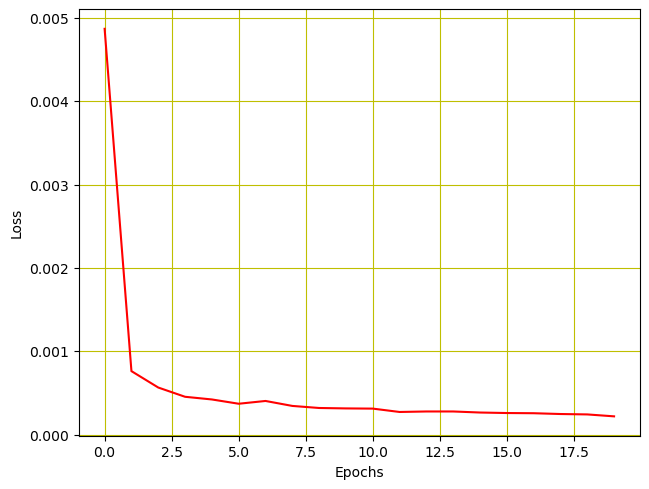

In [49]:
plt.plot(loss_listB, 'r')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()